In [2]:
import numpy as np
import cv2
from utils import *


c:\Users\PC\anaconda3\envs\seg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
from utils import get_preprocessing
import segmentation_models_pytorch as smp
import logging
from natsort import natsorted
import random

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
class Dataset(BaseDataset):

    def __init__(
            self,
            images_dir,
            masks_dir,
            augmentation=None,
            preprocessing=None,
    ):
        self.image_ids = natsorted(os.listdir(images_dir))
        self.mask_ids = natsorted(os.listdir(masks_dir))
        
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.image_ids]
        self.masks_fps = [os.path.join(masks_dir, mask_id) for mask_id in self.mask_ids]
        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], cv2.IMREAD_GRAYSCALE)
        mask = mask>1
            
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.image_ids)



    

train_dataset = Dataset(
    "images/train/cropped_image",
    "images/train/mask/cropped_ma",
)
val_dataset = Dataset(
"images/val/cropped_image",
"images/val/mask/cropped_ma",
)

In [39]:
train_loader = DataLoader(train_dataset,batch_size = 1, shuffle=True,drop_last=True)
valid_loader = DataLoader(val_dataset, batch_size = 1, shuffle=False,drop_last=True)

In [40]:
total_data = 0

# Iterate over the training dataset
for batch in train_loader:
    # Increment the total_data count by the size of the batch
    total_data += batch[0].size(0)

print("Total data in the training dataset:", total_data)

Total data in the training dataset: 4300


In [2]:
auc_pr_result = auc_pr_folder_calculation(pred_mask_dir=f"images/test/merged_pred_probs_masks_ma", test_mask_dir=f"images/test/mask/ma", stride=512)

0.4025424001119603
0.18401981083071717
0.06124819332711644
0.25863097008649766
0.34646968114086263
0.3342899052160117
0.06077086703793304
0.21816180169338054
0.43988050267973977
0.3119726694673214
0.31843882768639475
0.25783695608309665
0.2945224421445468
0.01682646681643045
0.3742282630345671
0.30794512036667077
0.16991153619659807
0.44964198675261946
0.18439406768056218
0.3562622550518224
0.41094877377223693
0.4232911620001781
0.44793667933228687
0.37490252052329476
0.1424118783662005
0.4615981567069861
0.2824579475069488


In [3]:
auc_pr_result

0.29227932746714747

In [3]:
test_image = cv2.imread("images/test/mask/ma/IDRiD_66.png.png",cv2.IMREAD_GRAYSCALE)
test_pred = np.load("images/test/merged_pred_probs_masks_ma/merged_IDRiD_66.png_1.png_probs.npy")

In [9]:
test_image.shape

(2752, 2752)

In [10]:
len(test_image[test_image==True])

5868

In [9]:
cv2.resize(test_image,((2560,2560)))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:


result = calculate_auc_pr(cv2.resize(test_image,((2560,2560)))>1,test_pred>1)

In [13]:
result

0.5004667663574218

In [20]:
auc_pr_folder_calculation()

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

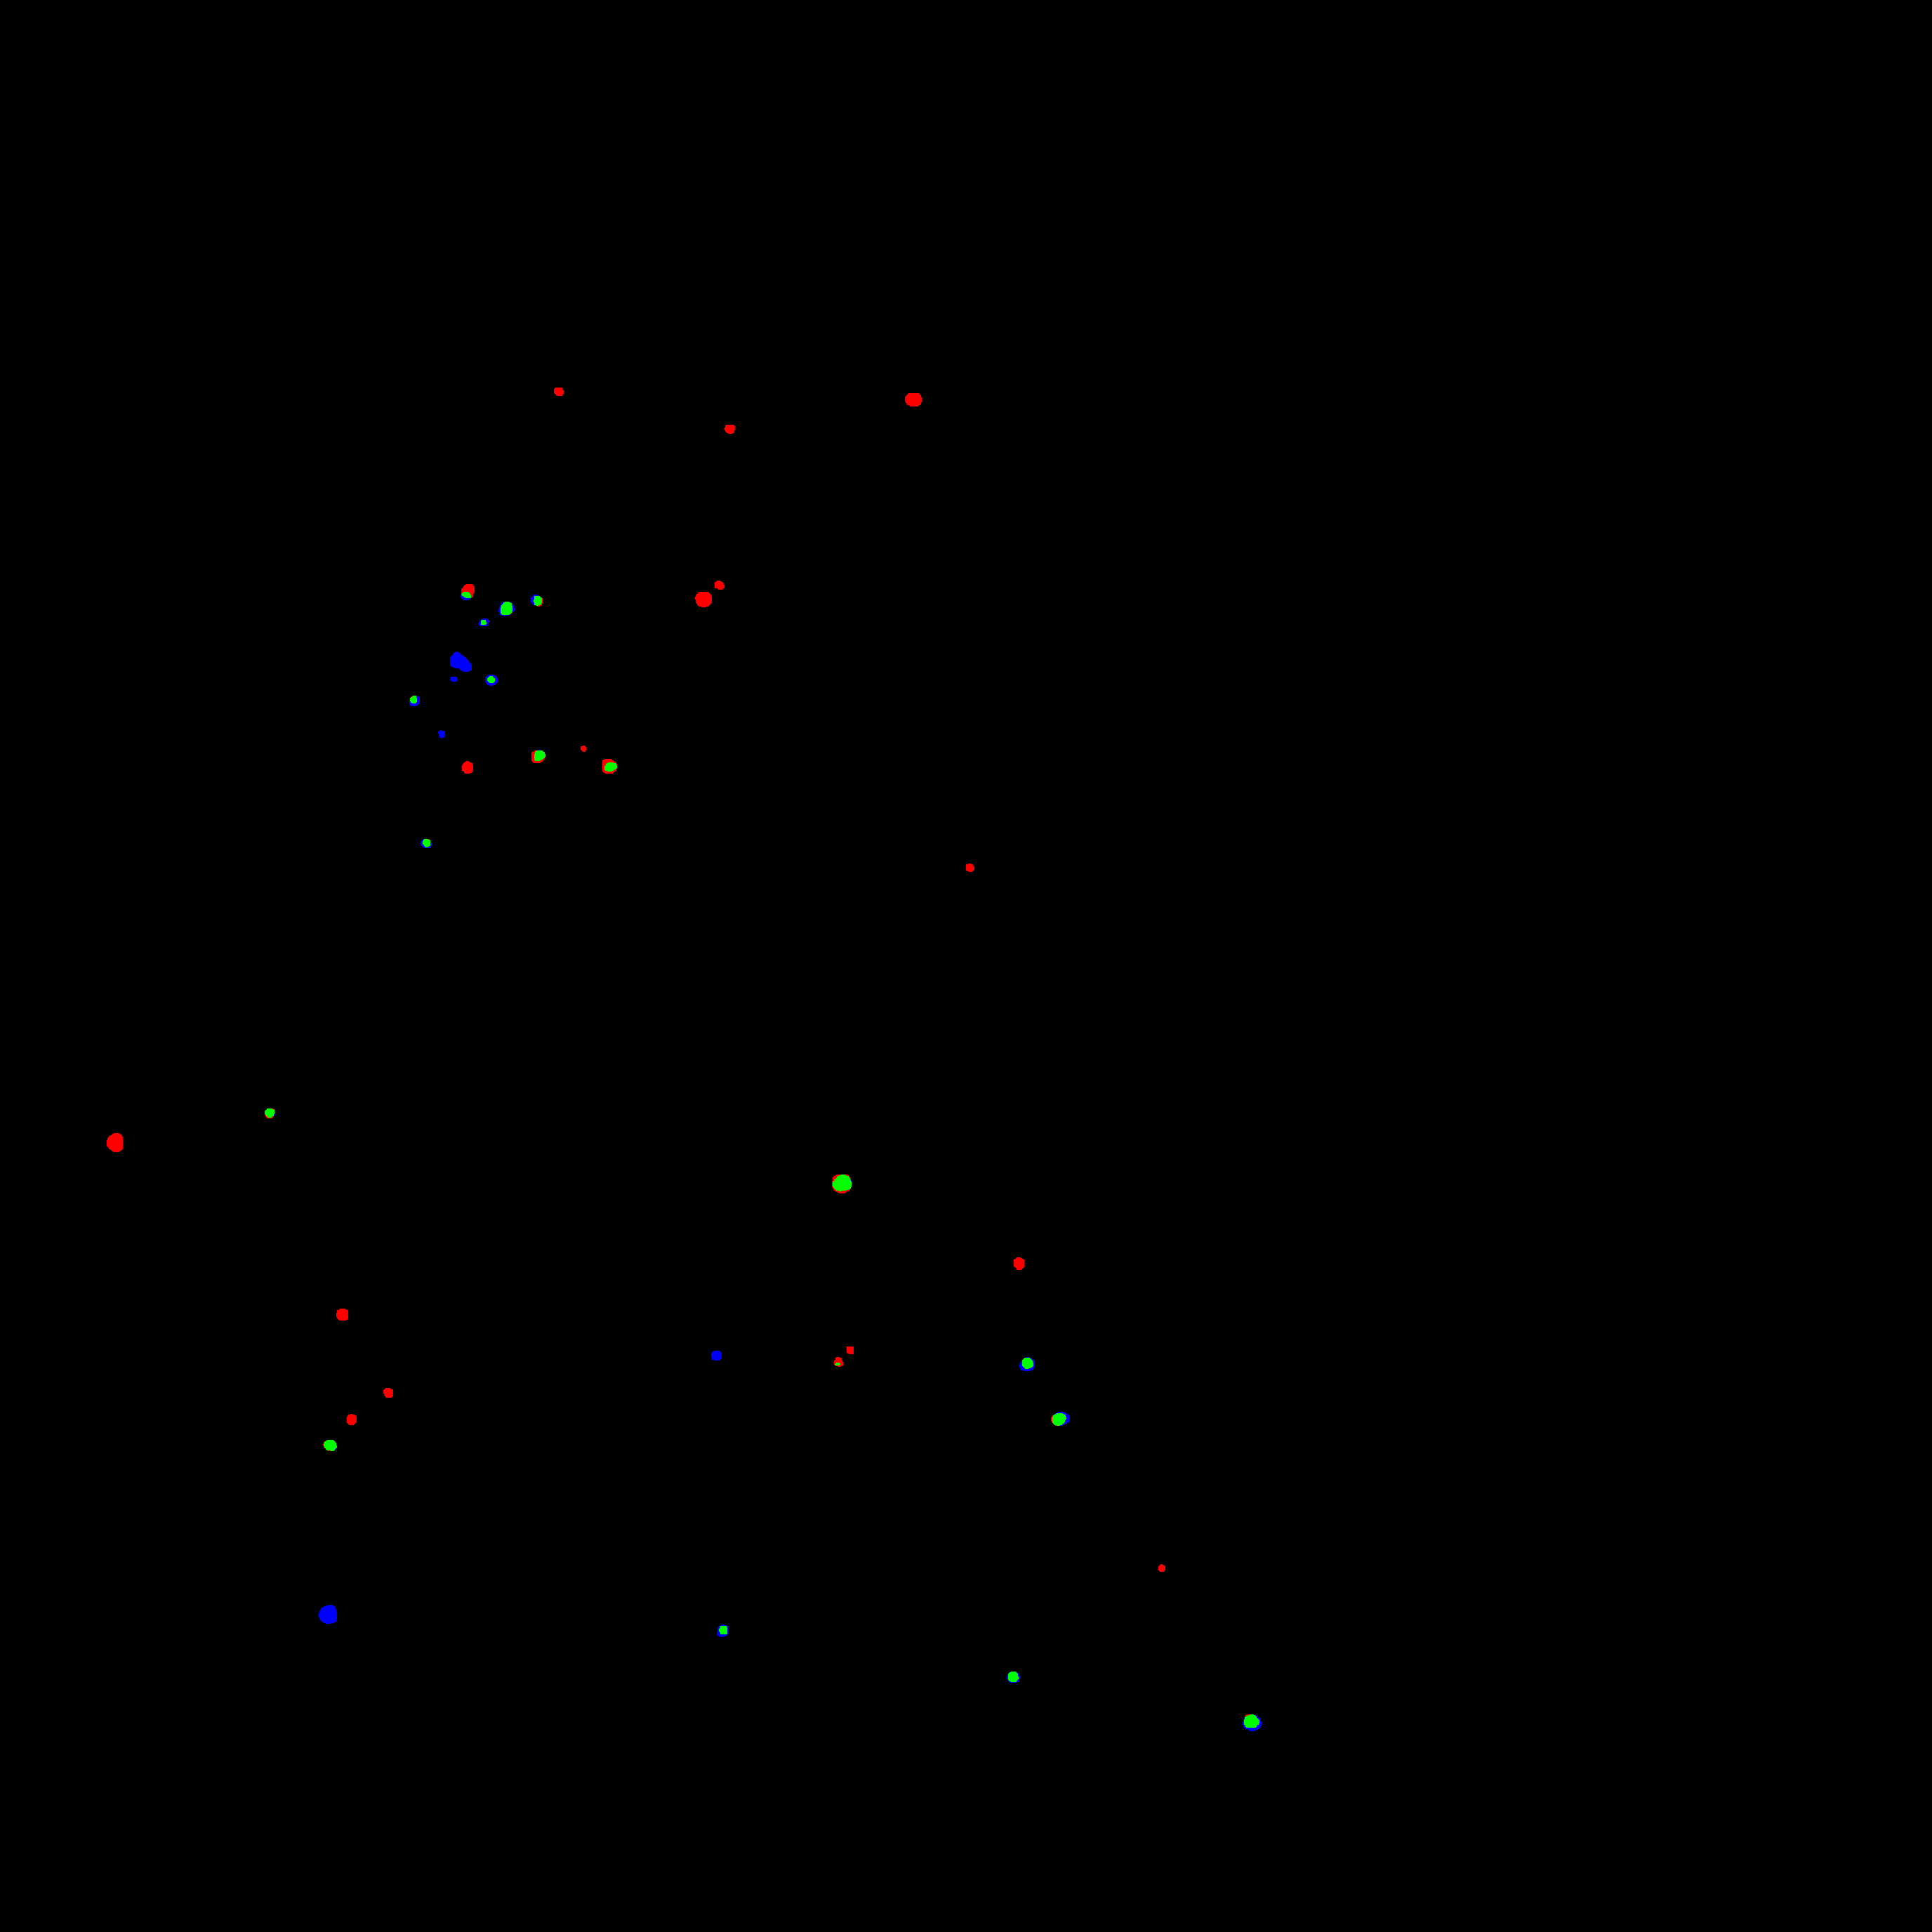

In [32]:
colorize_mismatches(test_image>1,test_pred>1)

In [ ]:
def plot_save_mismatches(dir1,dir2,save_dir):
    
    images = os.listdir(dir1)
    masks = os.listdir(dir2)
    masks = natsorted(masks)
    images = natsorted(images)
    for image,mask in zip(images,masks):
        colorize_mismatches(image>1,mask>1)
        cv2.imwrite(colorize_mismatches(image>1,mask>1),f"{save_dir}/{image}.png")


In [7]:
import matplotlib.pyplot as plt

In [ ]:
colorize_mismat


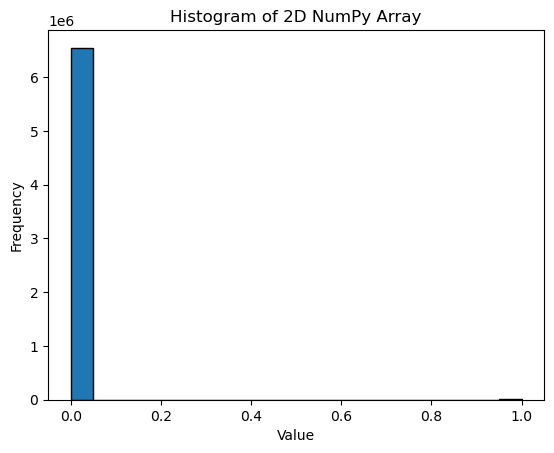

In [8]:
flattened_data = test_Array.flatten()

# Plot the histogram
plt.hist(flattened_data, bins=20, edgecolor='black',)
plt.title('Histogram of 2D NumPy Array')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
test_image = cv2.imread("images/test/mask/ma/IDRiD_55.png.png")

In [23]:
new_width = test_image.shape[:2][0] - (test_image.shape[:2][0] % 256)
new_height = test_image.shape[:2][1] - (test_image.shape[:2][1] % 256)
test_image = cv2.resize(test_image, (new_width ,new_height))

In [24]:
test_image.shape

(2560, 2560, 3)

In [46]:
test_mask.shape

(512, 512)

In [47]:
test_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
test_mask[120:400,120:400] = 1

In [49]:
pred_mask1 = np.random.rand(512,512)
pred_mask1[100:200 , 100:200 ]= 0.5
pred_mask1[150:170,150:170] = 0.9

In [50]:
pred_mask1[120:170,120:170] = 0.9
pred_mask1[70:120,70:120] = 0.8
pred_mask1[20:70,20:70] = 0.7
pred_mask1[250:400,250:300] = 0.6

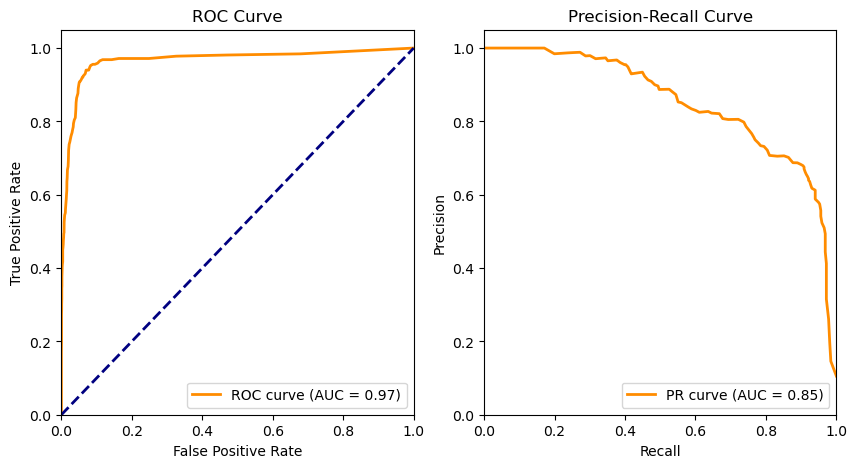

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Create an imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.90, 0.10  ], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get the probability scores for the testing set
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calculate the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

# Plot the ROC curve
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [52]:
calculate_auc_pr(test_mask,pred_mask1)

0.299072265625
1.0
0.2997098923186238
0.9738010204081633
0.30075522529337284
0.9483418367346939
0.3018292555743278
0.9228698979591837
0.30289355838787463
0.8972448979591837
0.3038914832110296
0.8715561224489796
0.30509379184054697
0.8457908163265306
0.30654444275041925
0.8206632653061224
0.30766341282589893
0.7939795918367347
0.3092086345711469
0.7680994897959184
0.3110854651535552
0.7426530612244898
0.3132066434228554
0.7172831632653062
0.3153449057656757
0.6919005102040816
0.31750325192380163
0.6662627551020408
0.31994419244686817
0.6405739795918367
0.3222051144731557
0.6139158163265306
0.32513715148010774
0.588125
0.316080532273395
0.5132397959183673
0.3190253186747139
0.48746173469387755
0.32219432275528015
0.4615433673469388
0.2740410825044487
0.33982142857142855
0.2743302701197438
0.3141326530612245
0.27435800833708057
0.28794642857142855
0.28454689764649044
0.26293367346938773
0.28635326053427107
0.2368112244897959
0.2879566558073901
0.21082908163265307
0.30603402948661323
0.185

0.3116777075529833